<a href="https://colab.research.google.com/github/tanmayi-sharma/Parking-Citations-Analysis/blob/main/Notebooks/Time_Series_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TIME SERIES COMPARISONS BETWEEN PARKING CITATIONS DATA AND MOBILITY DATASETS

* In this notebook, we try to plot the time-series comparison between Parking Citations data and the mobility datsets.
* In this notebook, we see:
>1.  Data collection and libraries import
>2. Comparing parking tickets with Google mobility time series
>3. Comparing parking tickets with Apple mobility time series
>4. Comparing parking tickets with Meta mobility time series


##1. Data collection and libraries import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid__2020.csv')

<ipython-input-3-b52f4c7b3074>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Parking citations/parking_citations_covid__2020.csv')


In [ ]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [ ]:
# df['Issue Date'] = pd.to_datetime(df['Issue Date'])
# df.dropna(subset = ['Issue time'],inplace = True)
# df['Issue time'].astype(int).astype(str).str.pad(4, fillchar='0')
# df['Issue time'] = pd.to_datetime(df['Issue time'], format = '%H%M', errors = 'coerce').dt.time
# df1 = pd.read_csv("/content/drive/My Drive/Parking citations/2022_US_Region_Mobility_Report.csv")
# df2 = pd.read_csv("/content/drive/My Drive/Parking citations/2021_US_Region_Mobility_Report.csv")
# df3 = pd.read_csv("/content/drive/My Drive/Parking citations/2020_US_Region_Mobility_Report.csv")
# df_google = pd.concat([df1, df2, df3], ignore_index=True)
# df_google.columns
# df_google['date'] = pd.to_datetime(df_google['date'])

In [ ]:
df_google = pd.read_csv("/content/drive/My Drive/Parking citations/google_mobility_concat.csv")

In [ ]:
df_google['date'] = pd.to_datetime(df_google['date'])

In [ ]:
df_apple = pd.read_csv("/content/drive/My Drive/Parking citations/apple_mobility_modified.csv")

<ipython-input-8-859b305eab28>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apple = pd.read_csv("/content/drive/My Drive/Parking citations/applemobilitytrends.csv")


In [ ]:
df_meta = pd.read_csv("/content/drive/My Drive/Parking citations/meta_mobility_concat.csv")

In [ ]:
# df_USA = df_apple[df_apple['country'] == 'United States']
# df_USA_CA = df_USA[df_USA['sub-region'] == 'California']
# df_USA_CA_LA = df_USA_CA[df_USA_CA['region']=='Los Angeles County']
# df_USA_CA_LA_T = df_USA_CA_LA.transpose()
# df_USA_CA_LA_T = df_USA_CA_LA_T.reset_index()
# df_USA_CA_LA_T.head()
# df_USA_CA_LA_T = df_USA_CA_LA_T.drop([0,1])
# df_USA_CA_LA_T.head()
# df_USA_CA_LA_T = df_USA_CA_LA_T.rename(columns={'index':'Date', 3464: 'Driving', 3465: 'Transit', 3466: 'Walking'})
# df_USA_CA_LA_T
# df_USA_CA_LA_T = df_USA_CA_LA_T.drop([2,3,4,5])
# df_USA_CA_LA_T['Date'] = pd.to_datetime(df_USA_CA_LA_T['Date'])
# df_apple = df_USA_CA_LA_T
# df_apple

In [ ]:
# df_1 = pd.read_csv("/content/drive/My Drive/Parking citations/movement-range-data-2020-03-01--2020-12-31.txt", delimiter = '\t')
# df_2 = pd.read_csv("/content/drive/My Drive/Parking citations/movement-range-2022-05-22.txt", delimiter = '\t')
# df_meta = pd.concat([df_1, df_2], ignore_index=True)
# df_meta['ds'] = pd.to_datetime(df_meta['ds'])

<ipython-input-52-17bde2f25b68>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("/content/drive/My Drive/Parking citations/movement-range-data-2020-03-01--2020-12-31.txt", delimiter = '\t')


##2. Comparing parking tickets with google mobility time series

In [ ]:

start_date = '2020-01-01'
end_date = '2020-02-29'

filtered_df = df[(df['Issue Date'] >= start_date) & (df['Issue Date'] <= end_date)]

filtered_df['DayOfWeek'] = filtered_df['Issue Date'].dt.day_name()


<ipython-input-9-b259daf39167>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DayOfWeek'] = filtered_df['Issue Date'].dt.day_name()


In [ ]:
med_list = []
weekdays = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for i in range(len(weekdays)):
    d = filtered_df[filtered_df['DayOfWeek'] == weekdays[i]]
    c = d.groupby('Issue Date')['Ticket number'].count()
    a = c.median()
    med_list.append(a)


In [ ]:
med_list

[8219.5, 8869.0, 8617.0, 8723.0, 7887.0, 4974.0, 2050.0]

In [ ]:
x = pd.DataFrame({'Weekday' : weekdays, 'Median_baseline_count' : med_list})

In [ ]:
median_weekdays = pd.DataFrame(x)

In [ ]:
df['Dayofweek'] = df['Issue Date'].dt.day_name()

In [ ]:
exg = pd.merge(df, median_weekdays, left_on = 'Dayofweek',right_on = 'Weekday', how = 'inner')

In [ ]:
per_day_count = exg.groupby(exg['Issue Date']).size()
# per_day_count = per_day_count.to_frame().reset_index()
# per_day_count.columns = ['Issue Date', 'Counts']
# per_day_count.sort_values(by="Issue Date")
# median_value = median_weekdays['Median_baseline_count'].item()
# per_day_count['pct_change'] = ((per_day_count['Counts'] - median_value)*100)/median_value

In [ ]:
per_day_count= per_day_count.to_frame().reset_index()

In [ ]:
per_day_count.columns = ['Issue Date', 'Counts']

In [ ]:
per_day_count['Dayofweek'] = per_day_count['Issue Date'].dt.day_name()

In [ ]:
req_df = pd.merge(per_day_count, median_weekdays, left_on = 'Dayofweek', right_on = 'Weekday')

In [ ]:
req_df['pct_change'] = ((req_df['Counts'] - req_df['Median_baseline_count'])*100)/req_df['Median_baseline_count']

In [ ]:
req_df = req_df.sort_values(by='Issue Date')

In [ ]:
req_df_google_range = req_df[(req_df['Issue Date'] >= '02-15-2020')&(req_df['Issue Date'] <= '10-15-2022')]

In [ ]:
req_df_google_range

,Issue Date,Counts,Dayofweek,Weekday,Median_baseline_count,pct_change
525,2020-02-15,4672,Saturday,Saturday,4974.0,-6.071572
698,2020-02-16,2040,Sunday,Sunday,2050.0,-0.487805
873,2020-02-17,1356,Monday,Monday,8219.5,-83.502646
1044,2020-02-18,8960,Tuesday,Tuesday,8869.0,1.026046
7,2020-02-19,8121,Wednesday,Wednesday,8617.0,-5.756064
...,...,...,...,...,...,...
1182,2022-10-11,6956,Tuesday,Tuesday,8869.0,-21.569512
145,2022-10-12,6817,Wednesday,Wednesday,8617.0,-20.888940
319,2022-10-13,7083,Thursday,Thursday,8723.0,-18.800871
492,2022-10-14,5934,Friday,Friday,7887.0,-24.762267


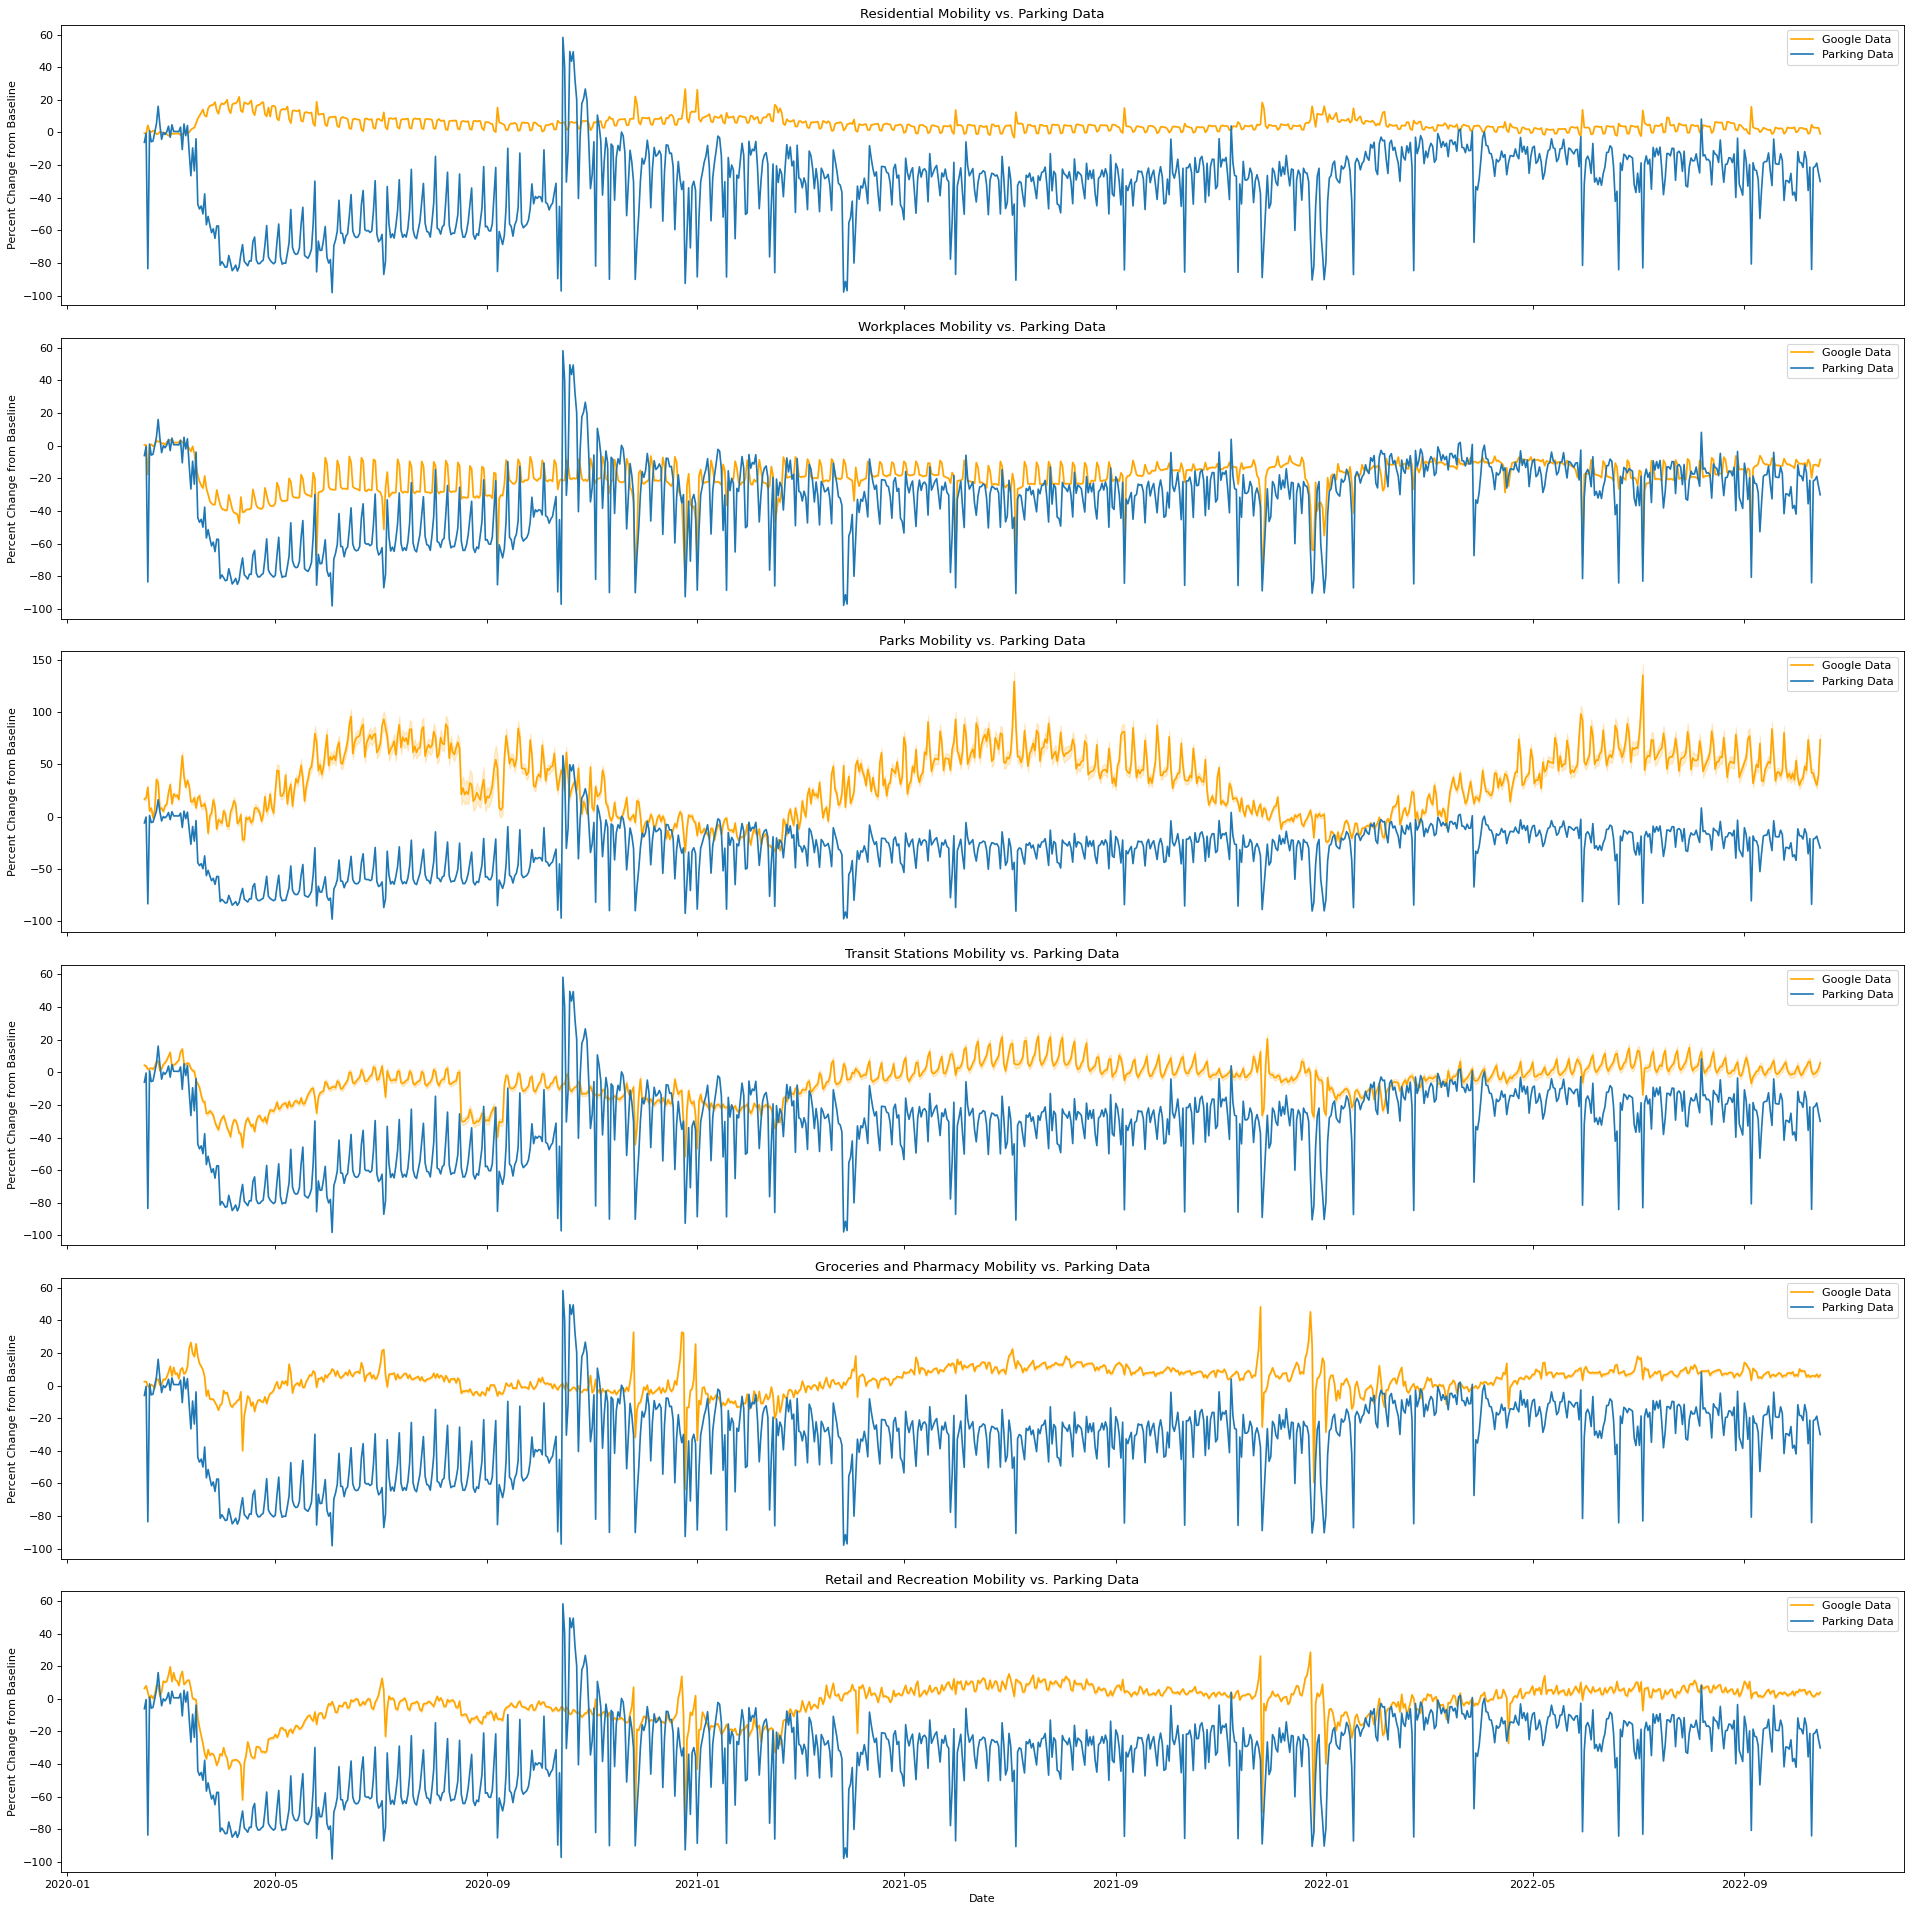

In [ ]:

fig, axes = plt.subplots(6, 1, figsize=(24, 24), dpi=80, sharex=True)
x_parking = req_df_google_range['Issue Date']
y_parking = req_df_google_range['pct_change']
columns_to_compare = [
    "residential_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "retail_and_recreation_percent_change_from_baseline"
]
subplot_titles = [
    "Residential Mobility vs. Parking Data",
    "Workplaces Mobility vs. Parking Data",
    "Parks Mobility vs. Parking Data",
    "Transit Stations Mobility vs. Parking Data",
    "Groceries and Pharmacy Mobility vs. Parking Data",
    "Retail and Recreation Mobility vs. Parking Data"
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(data=df_google, x="date", y=column, label='Google Data', color='Orange', ax=axes[i])
    sns.lineplot(x=x_parking, y=y_parking, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel('Percent Change from Baseline')
    axes[i].set_title(title)
    axes[i].legend()
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()


##3. Comparing parking tickets with Apple mobility time series

In [ ]:

filtered_df_apple = df[(df['Issue Date'] >= '01-13-2020') & (df['Issue Date'] <= '10-26-2021')]
#filtered_df_apple['DayOfWeek'] = filtered_df_apple['Issue Date'].dt.day_name()

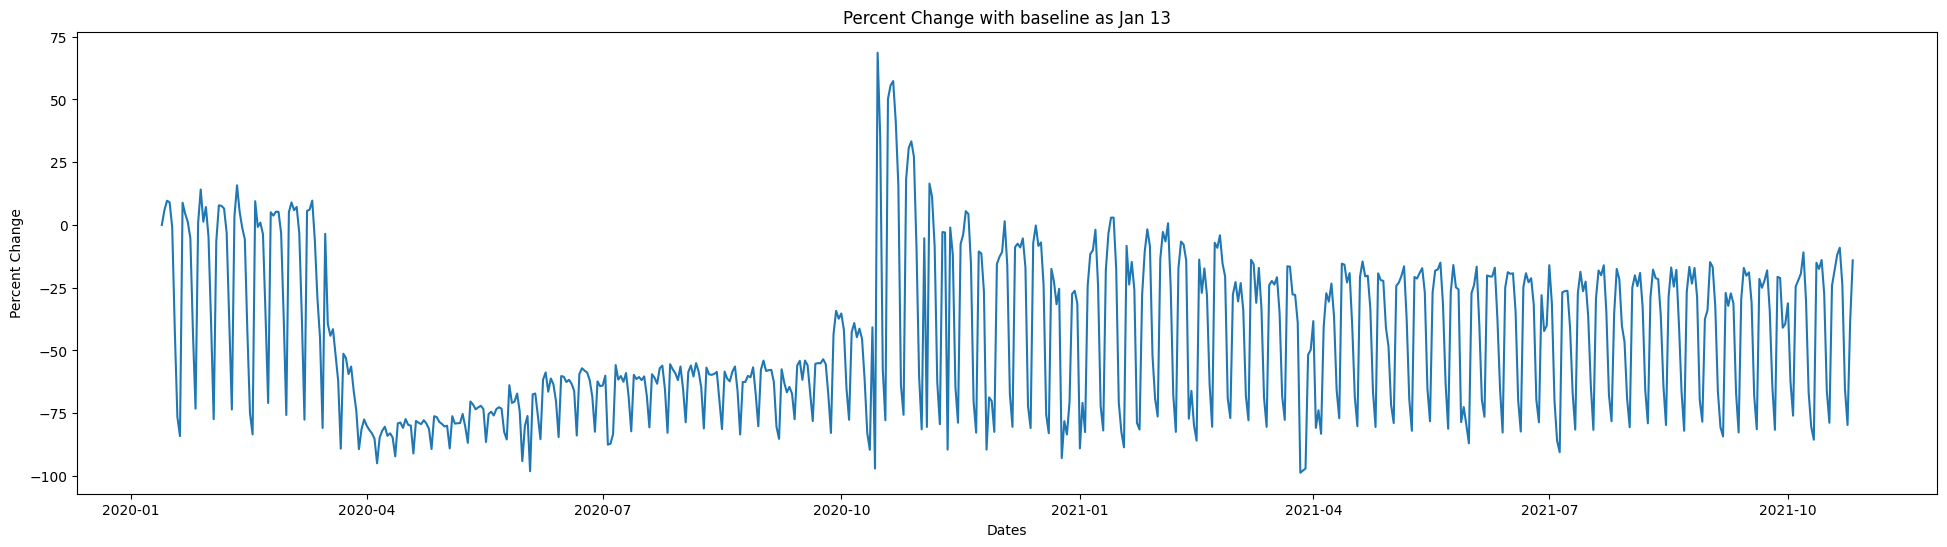

In [ ]:
figure(figsize=(24,6))
per_day_count_a = filtered_df_apple.groupby(df['Issue Date']).size()
per_day_count_a = per_day_count_a.to_frame().reset_index()
per_day_count_a.columns = ['Issue Date', 'Counts']
per_day_count_a.sort_values(by="Issue Date")
per_day_count_a['Rolling7DayAvg'] = per_day_count_a['Counts'].rolling(window=7).mean()

# find the baseline count and percentage change from that
df_Jan_13 = per_day_count_a.loc[per_day_count_a['Issue Date'] == '2020-01-13']
df_Jan_13 = df_Jan_13['Counts'].item()
per_day_count_a['pct_change'] = ((per_day_count_a['Counts'] - df_Jan_13)*100)/df_Jan_13

# plot
plt.plot(per_day_count_a['Issue Date'], per_day_count_a['pct_change'])
plt.title('Percent Change with baseline as Jan 13')
plt.xlabel('Dates')
plt.ylabel('Percent Change')
plt.show()

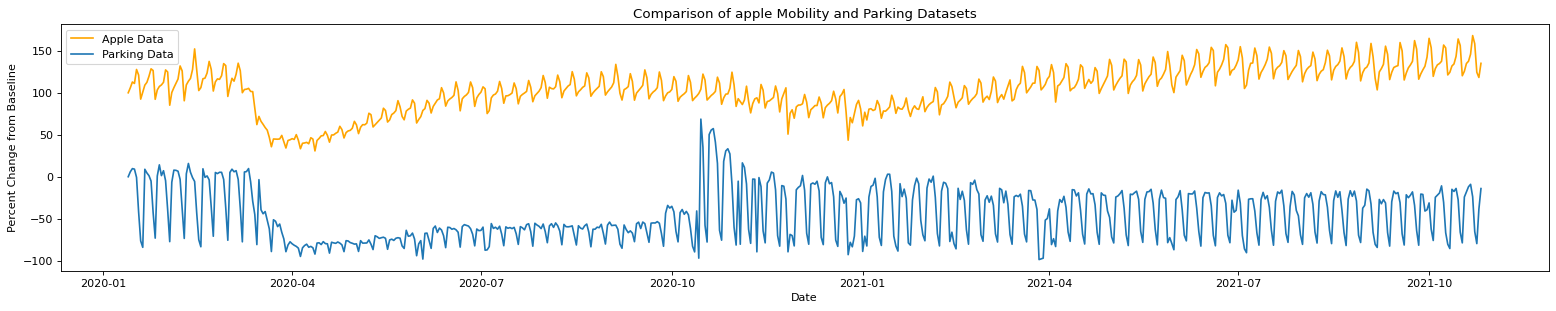

In [ ]:
figure(figsize=(24, 4), dpi=80)
sns.lineplot(data=df_apple, x="Date", y="Driving", label='Apple Data', color = 'Orange')
sns.lineplot(data=per_day_count_a, x="Issue Date", y="pct_change", label='Parking Data')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.title('Comparison of apple Mobility and Parking Datasets')
plt.legend()
plt.show()


##4. Comparing parking tickets with Meta mobility time series

Baseline for Meta data is the average number of bing tiles from February 2nd to 29th in 2020

In [ ]:
filtered_df_meta = df[(df['Issue Date'] >= '01-03-2020') & (df['Issue Date'] <= '5-22-2022')]
filtered_df_meta['Dayofweek'] = filtered_df_meta['Issue Date'].dt.day_name()

<ipython-input-12-ecb4b5c109bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_meta['Dayofweek'] = filtered_df_meta['Issue Date'].dt.day_name()


In [ ]:
baseline_d = filtered_df_meta[(filtered_df_meta['Issue Date'] >= '02-02-2020') & (filtered_df_meta['Issue Date'] <= '02-29-2020')]

In [ ]:
avg_list = []
weekdays = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for i in range(len(weekdays)):
    d = baseline_d[baseline_d['Dayofweek'] == weekdays[i]]
    c = d.groupby('Issue Date')['Ticket number'].count()
    a = c.mean()
    avg_list.append(a)

In [ ]:
avg_baseline_df = pd.DataFrame({'Weekday' : weekdays, 'Avg_baseline_count' : avg_list})

In [ ]:
avg_baseline_df

,Weekday,Avg_baseline_count
0,Monday,6517.50
1,Tuesday,8938.75
2,Wednesday,8540.75
3,Thursday,8423.50
4,Friday,7863.50
5,Saturday,5024.00
6,Sunday,2110.00


In [ ]:
m = pd.merge(filtered_df_meta, avg_baseline_df, left_on = 'Dayofweek',right_on = 'Weekday', how = 'inner')

In [ ]:
per_day_count_m = filtered_df_meta.groupby(filtered_df_meta['Issue Date']).size()
per_day_count_m = per_day_count_m.to_frame().reset_index()
per_day_count_m.columns = ['Issue Date', 'Counts']

In [ ]:
per_day_count_m['Dayofweek'] = per_day_count_m['Issue Date'].dt.day_name()

In [ ]:
req_df_m = pd.merge(per_day_count_m, avg_baseline_df, left_on = 'Dayofweek', right_on = 'Weekday')

In [ ]:
req_df_m['relative_change'] = (req_df_m['Counts'] - req_df_m['Avg_baseline_count'])/req_df_m['Avg_baseline_count']

In [ ]:
# figure(figsize=(24, 4), dpi=80)
# sns.lineplot(data=req_df_m, x="Issue Date", y="pct_change", label='Parking Data')

In [ ]:
df_meta['ds'].dtype

dtype('<M8[ns]')

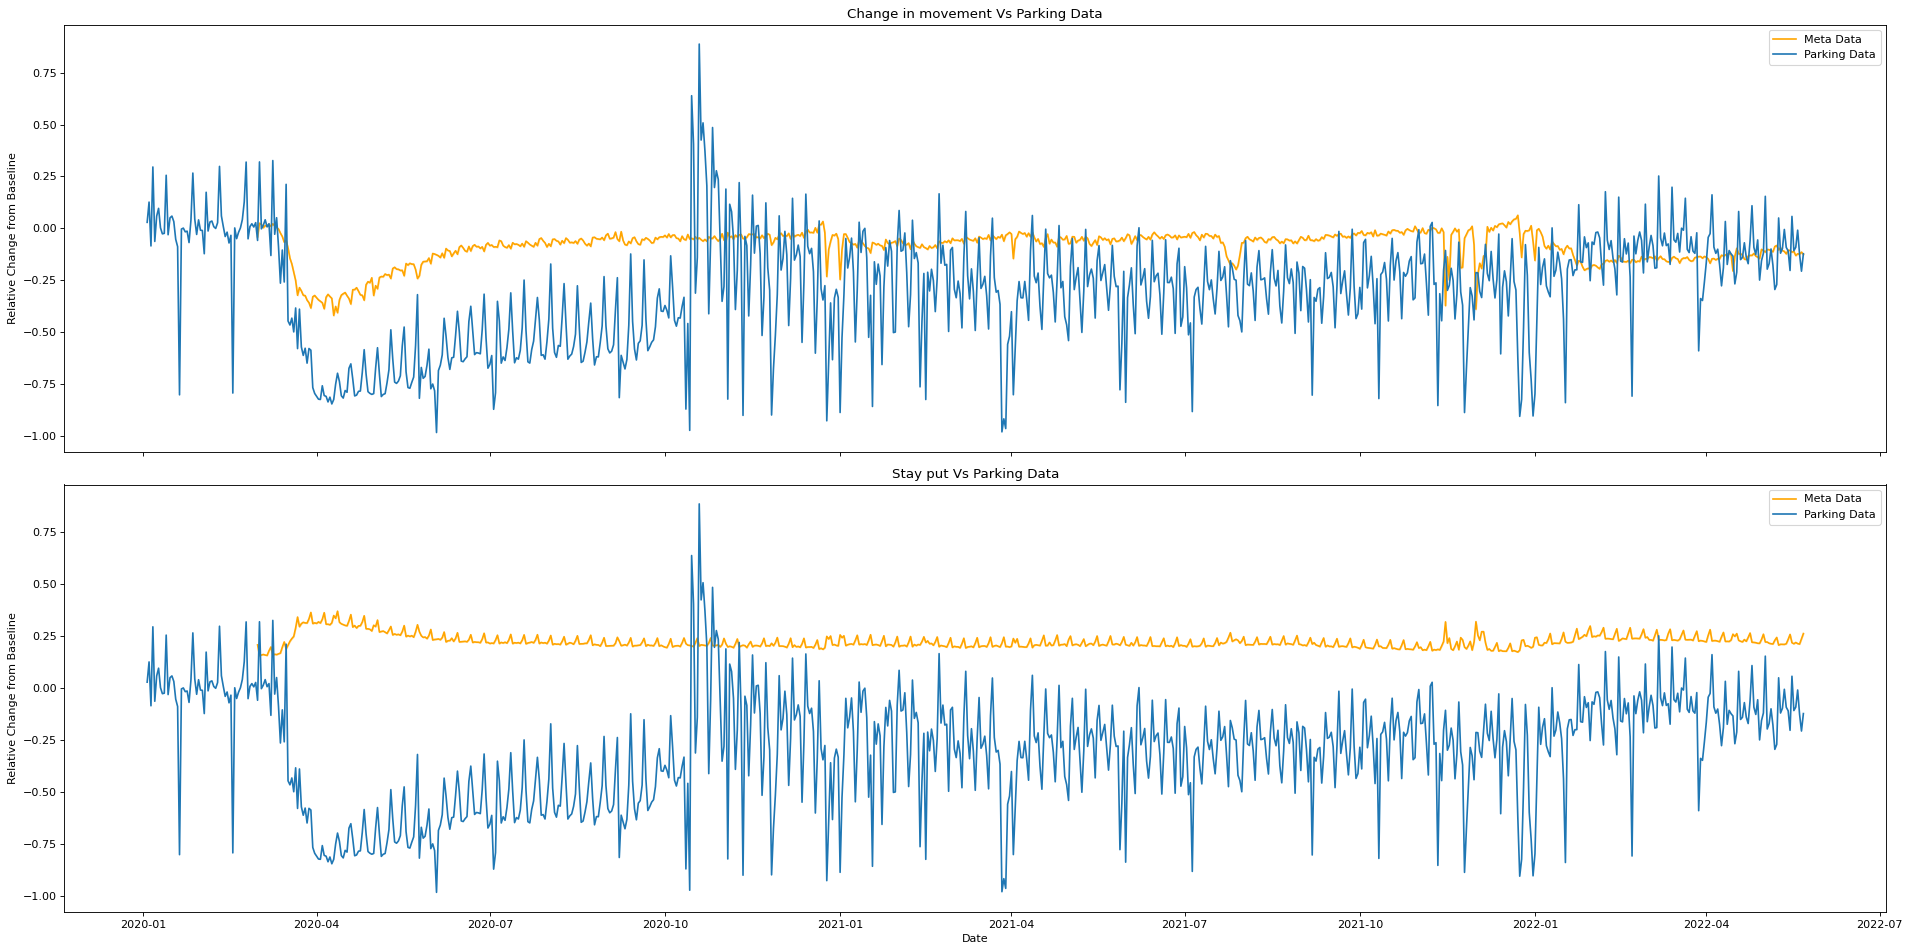

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(24, 12), dpi=80, sharex=True)
x_parking = req_df_m['Issue Date']
y_parking = req_df_m['relative_change']
columns_to_compare = [ 'all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users'

]
subplot_titles = [
    'Change in movement Vs Parking Data', 'Stay put Vs Parking Data'
]
for i, (column, title) in enumerate(zip(columns_to_compare, subplot_titles)):
    sns.lineplot(data=df_meta, x="ds", y=column, label='Meta Data', color='Orange', ax=axes[i])
    sns.lineplot(x=x_parking, y=y_parking, label='Parking Data', ax=axes[i])
    axes[i].set_ylabel('Relative Change from Baseline')
    axes[i].set_title(title)
    axes[i].legend()
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()
